In [1]:
import sys

PWD = '../..'
sys.path.append(PWD)

import matplotlib.pyplot as plt
import numpy as np

# Maximum per channel

In [2]:
FILE_NAME = "Ntuple_runsampic_166_runtelescope_643.npz"
channel_events = np.load(PWD + f'/data/extracted/{FILE_NAME}', allow_pickle=True)['arr_0'].flat[0]

In [3]:
def plot_channel_events_histograms(channel_events, ylim=True):
    for channel, events in list(channel_events.items()):
        print(f"Number of events: {len(events['eventIDSampic'])}")
        plt.figure(figsize=(16, 6))
        
        ampl_data = np.array(events['sample_ampl'])

        plt.subplot(1, 2, 1)
        X = np.max(ampl_data[:, 0], axis=1)
        counts, bins, _ = plt.hist(X, bins=100, range=(0, 1))
        plt.title('Channel 0')
        plt.xlim(-0.05, 1.05)
        if ylim:
            plt.ylim(0, np.max(counts) + 50)

        plt.subplot(1, 2, 2)
        X = np.max(ampl_data[:, 1], axis=1)
        plt.hist(X, bins=100, range=(0, 1))
        plt.title(f'Channel {channel}')
        plt.xlim(-0.05, 1.05)
        if ylim:
            plt.ylim(0, np.max(counts) + 50)

        plt.show()

Number of events: 19676


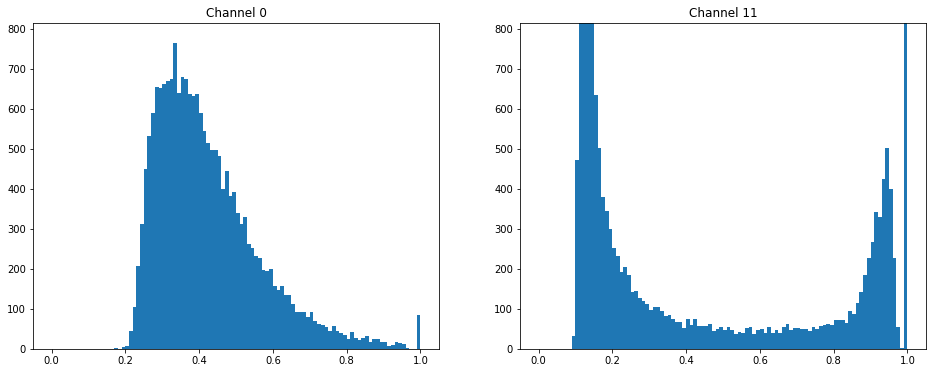

Number of events: 15814


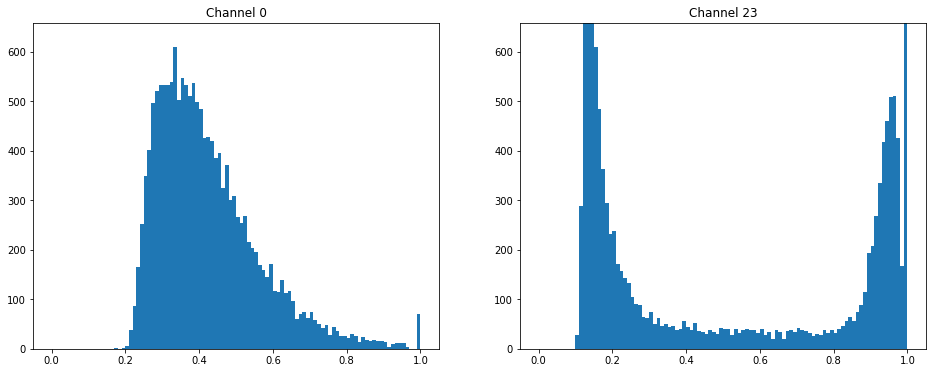

Number of events: 15095


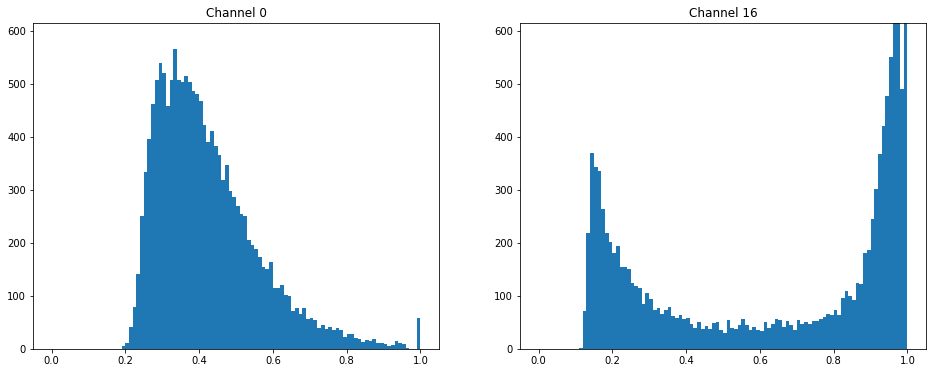

Number of events: 13483


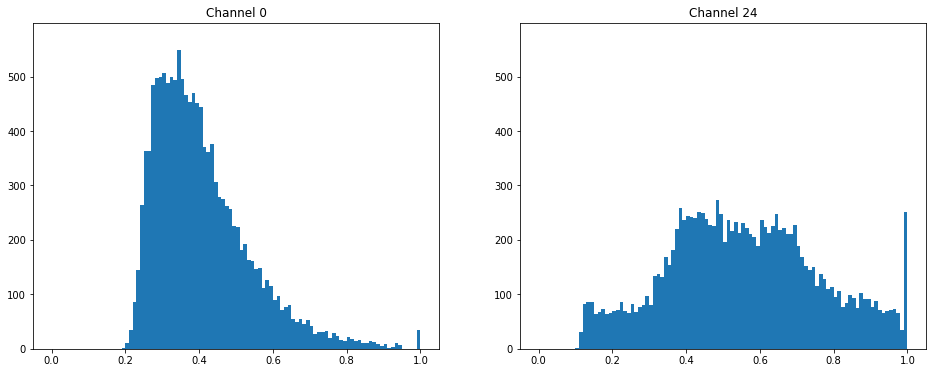

Number of events: 12256


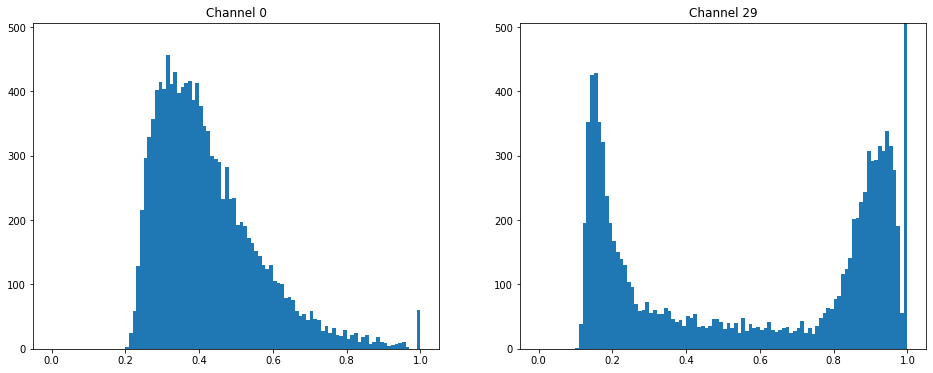

Number of events: 11968


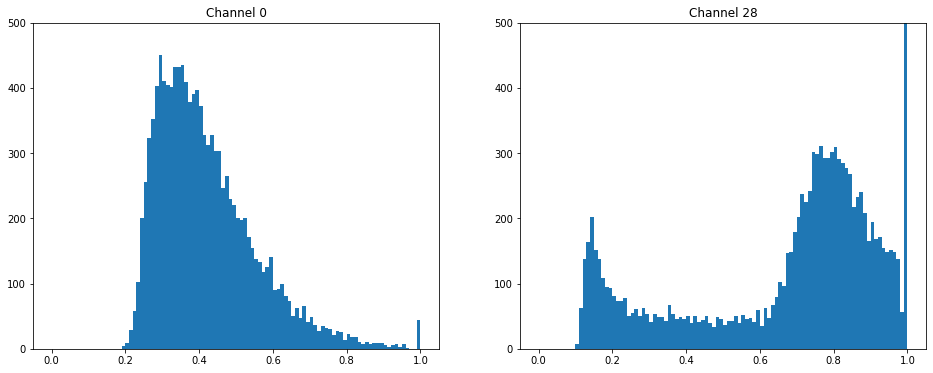

Number of events: 11761


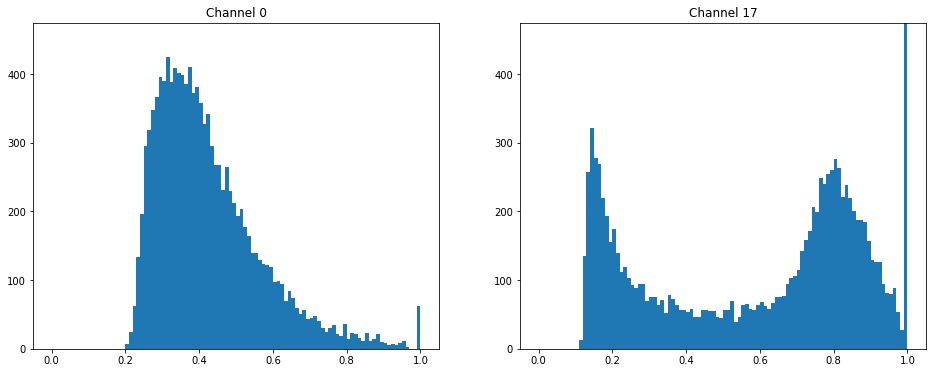

Number of events: 11111


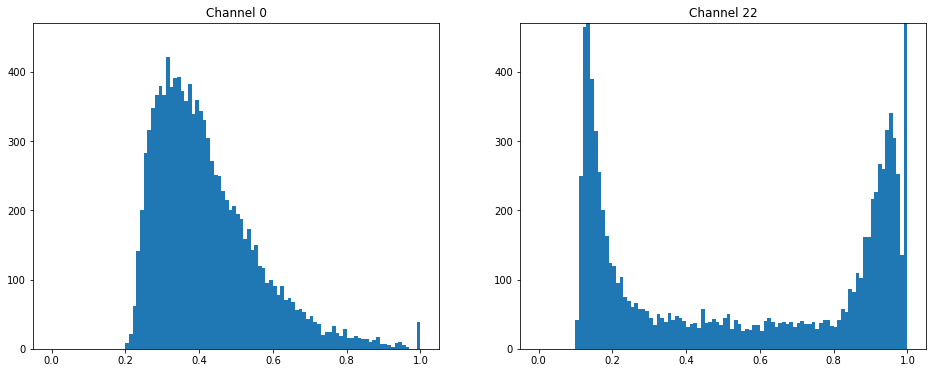

Number of events: 10802


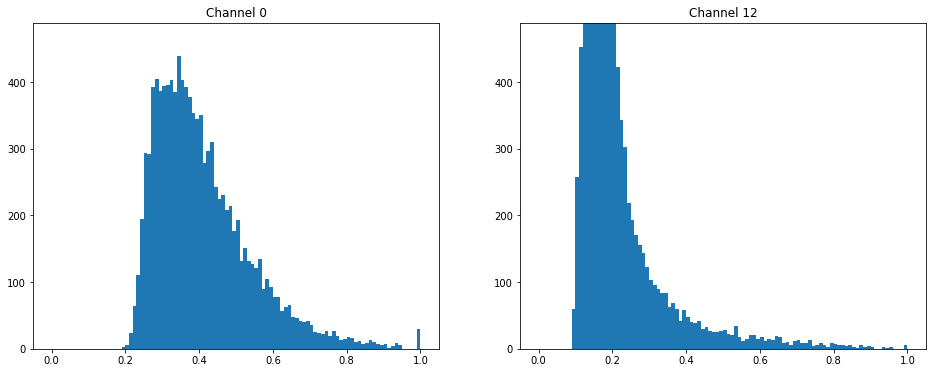

Number of events: 10511


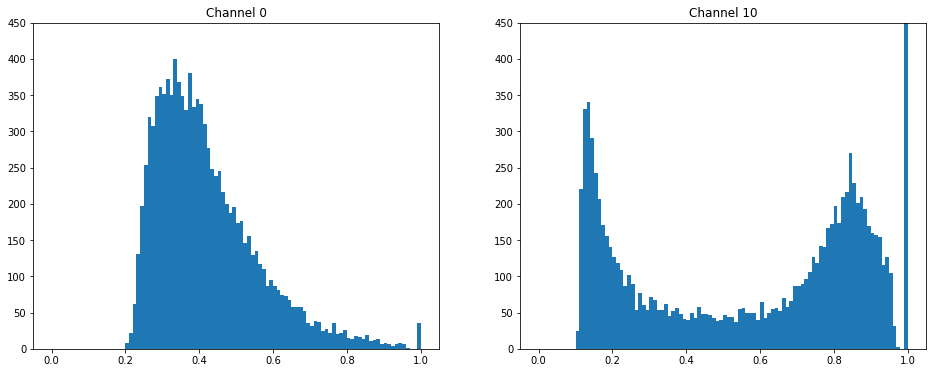

Number of events: 9221


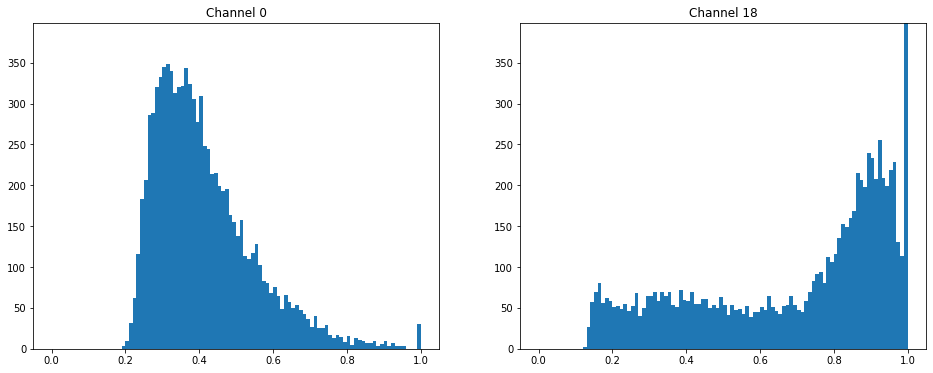

Number of events: 8836


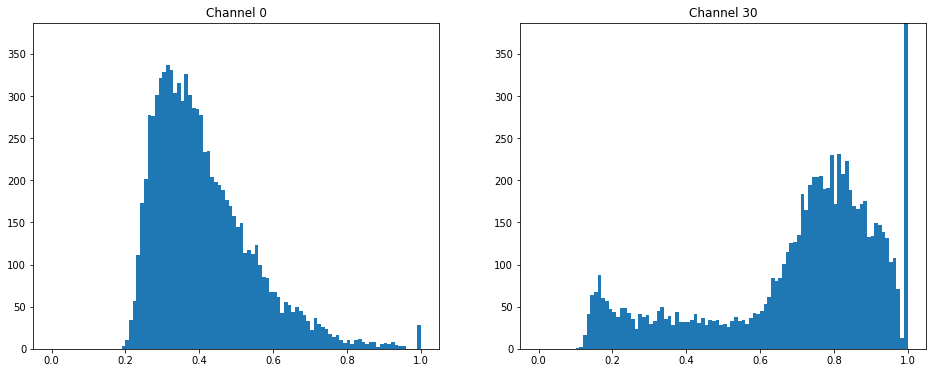

Number of events: 3355


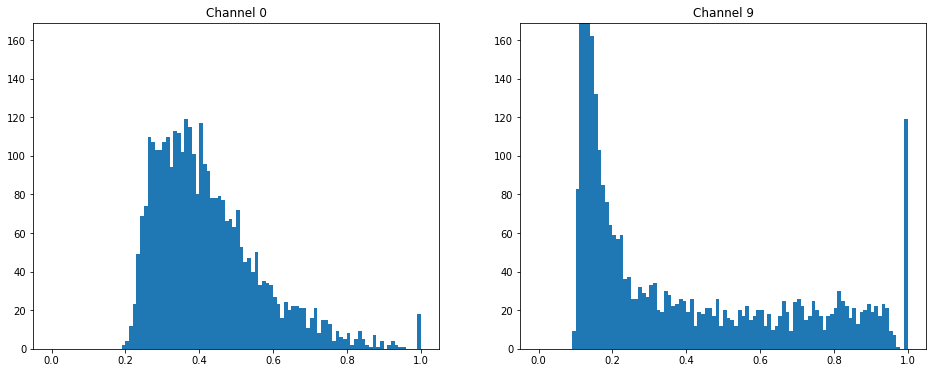

Number of events: 2769


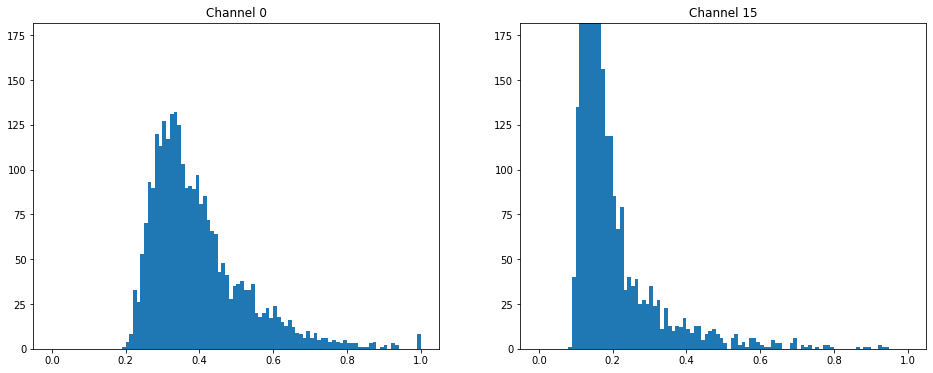

Number of events: 2742


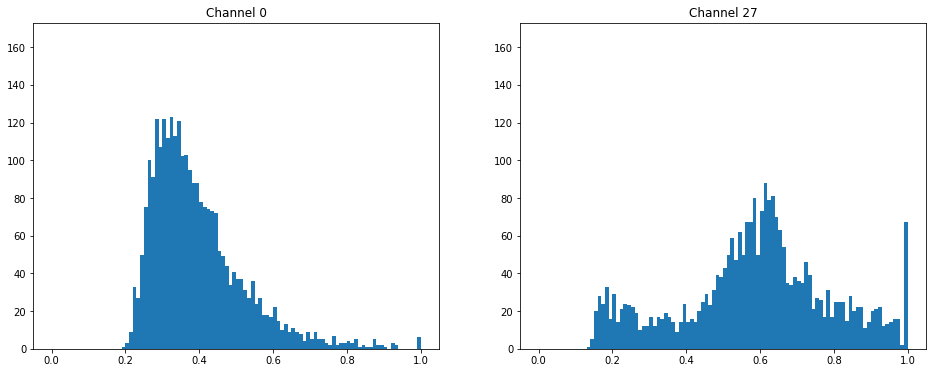

Number of events: 2724


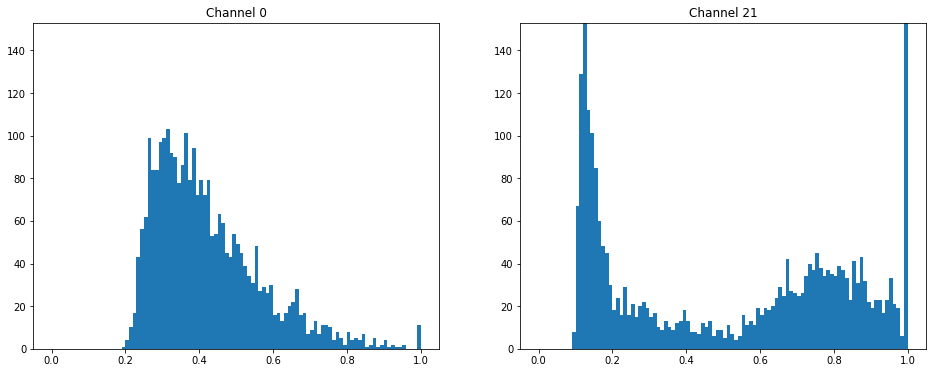

Number of events: 772


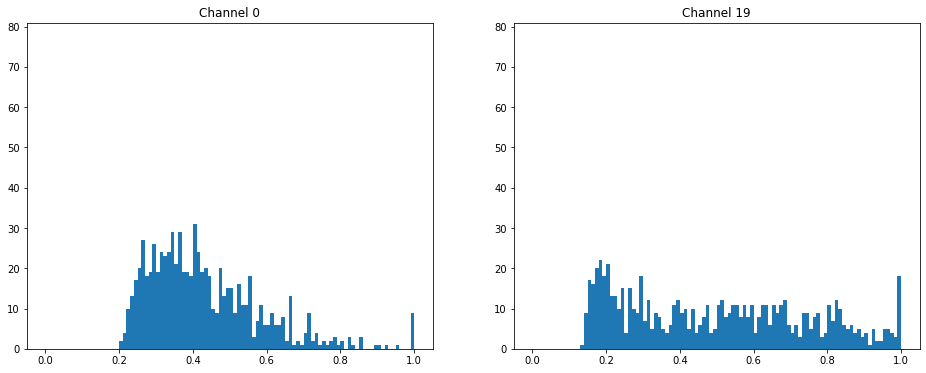

Number of events: 673


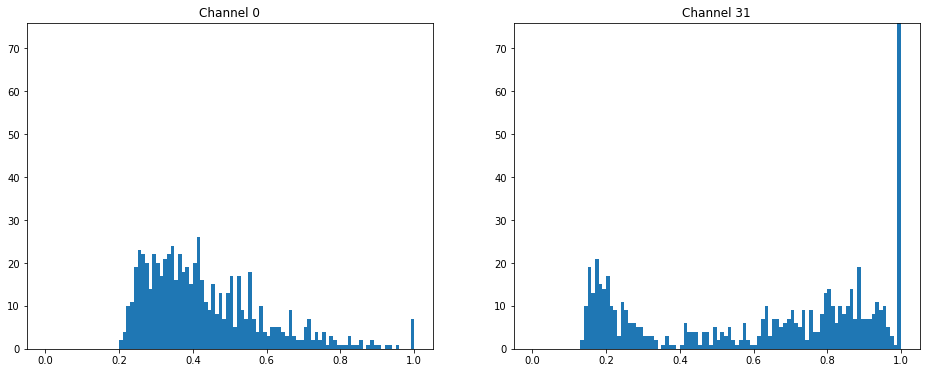

Number of events: 646


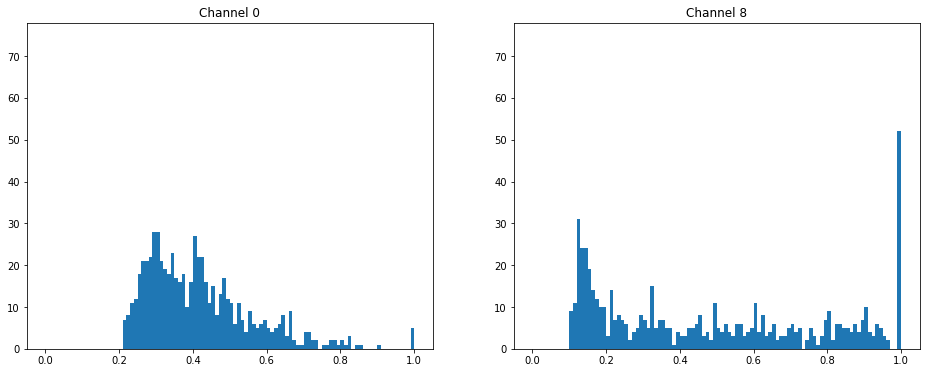

Number of events: 401


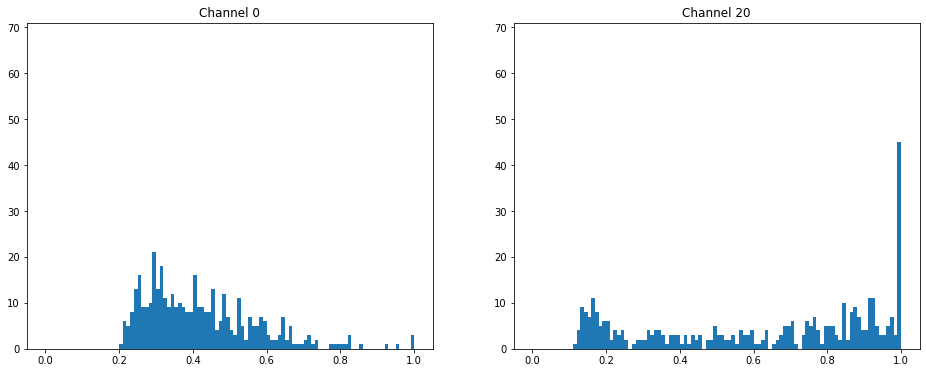

Number of events: 359


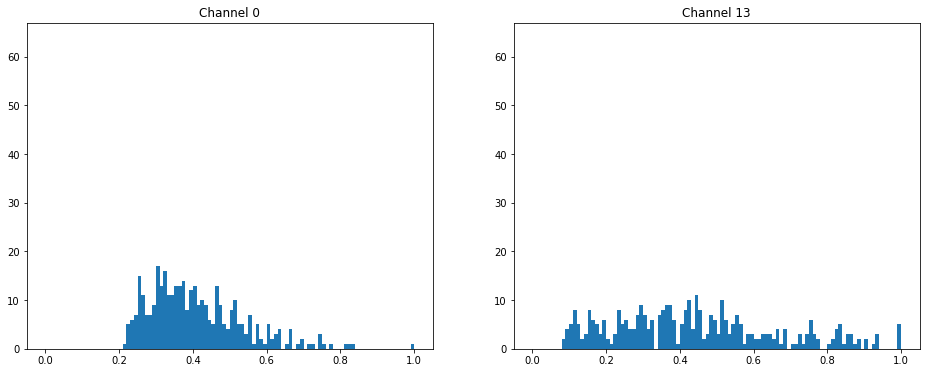

Number of events: 277


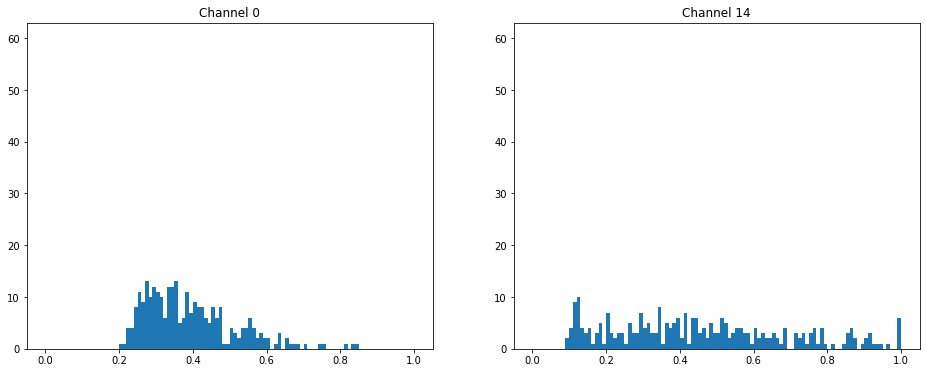

Number of events: 238


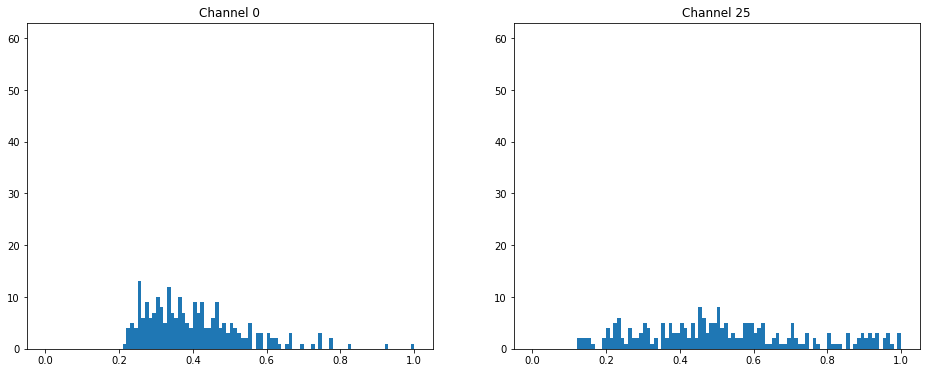

Number of events: 185


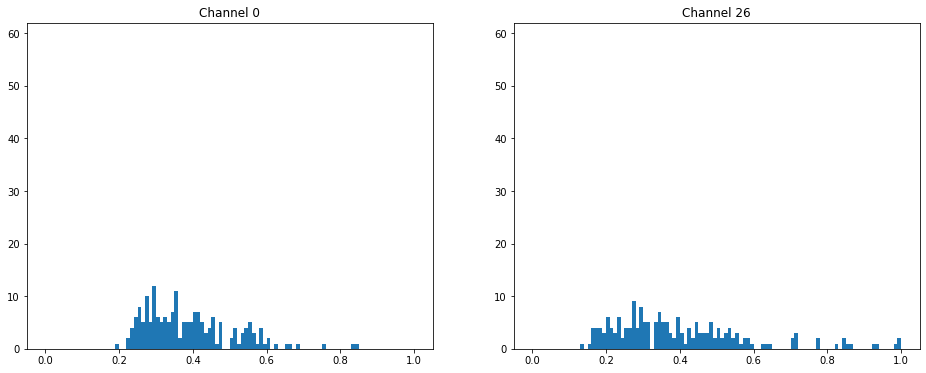

In [4]:
plot_channel_events_histograms(channel_events)

# Filter wrong events - the best channel

In [5]:
best_channel = 17
best_channel_events = channel_events[best_channel]

Number of events: 11761


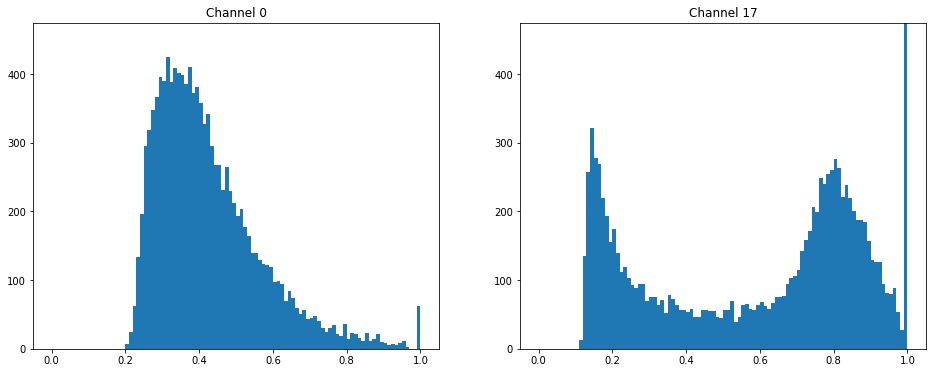

In [6]:
plot_channel_events_histograms({best_channel: best_channel_events})

In [7]:
def filter_channel_events(channel_events, th_ch_min, th_ch_max, th_0_min=0.2, th_0_max=0.95):
    filtered_channel_events = {}
        
    ampl_data = np.array(channel_events['sample_ampl'])
    max_ampl = np.array(ampl_data.max(axis=2))

    ch_0_mask = np.logical_and(max_ampl[:, 0] >= th_0_min, max_ampl[:, 0] <= th_0_max)
    ch_ch_mask = np.logical_and(max_ampl[:, 1] >= th_ch_min, max_ampl[:, 1] <= th_ch_max)
    mask = np.logical_and(ch_0_mask, ch_ch_mask)

    for key, arr in channel_events.items():
        filtered_channel_events[key] = np.array(arr)[mask]
        
    return filtered_channel_events

single_filtered_channel_events = filter_channel_events(best_channel_events, th_ch_min=0.6, th_ch_max=0.98)

Number of events: 5667


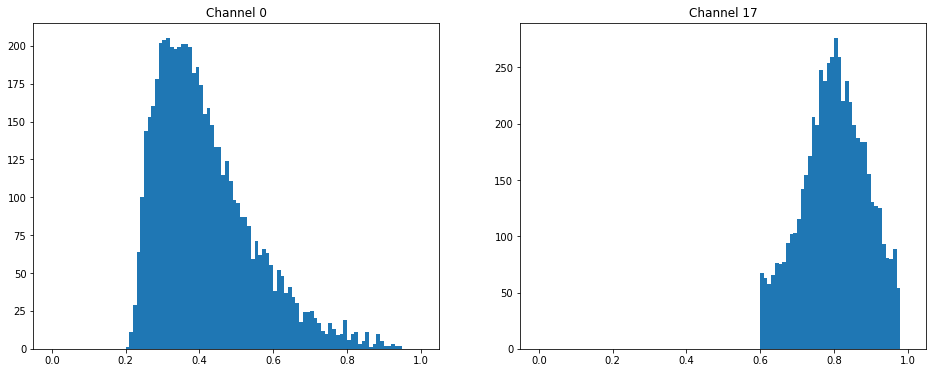

In [8]:
plot_channel_events_histograms({best_channel: single_filtered_channel_events}, ylim=False)

# Filter wrong events - all channels

In [9]:
channel_thresholds = {
    17: (0.6, 0.98),
    11: (0.82, 0.98),
    23: (0.85, 0.99),
    16: (0.8, 0.99),
    24: (0.3, 0.82),
    29: (0.75, 0.99),
    28: (0.62, 0.99),
    22: (0.84, 0.99),
    # 12: (),
    10: (0.68, 0.95),
}

In [10]:
filtered_channel_events = {}

for channel, (th_min, th_max) in channel_thresholds.items():
    filtered_channel_events[channel] = filter_channel_events(channel_events[channel], th_min, th_max)

Number of events: 5667


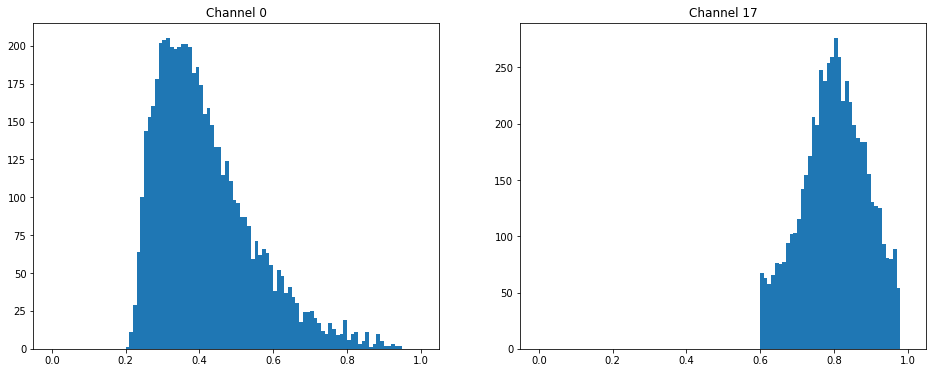

Number of events: 3518


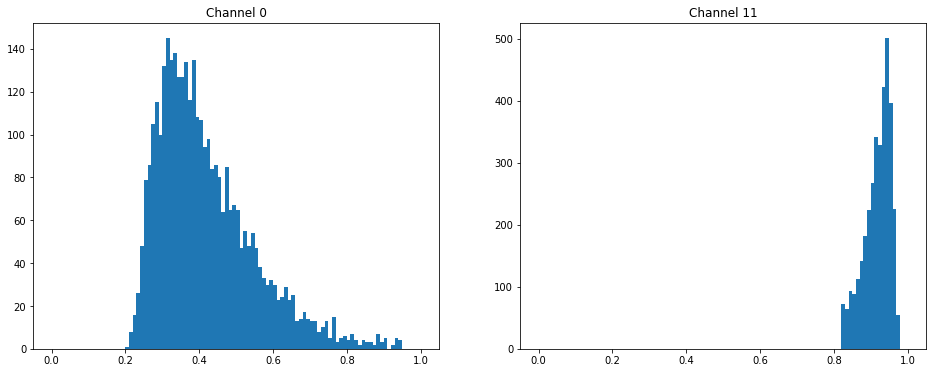

Number of events: 3813


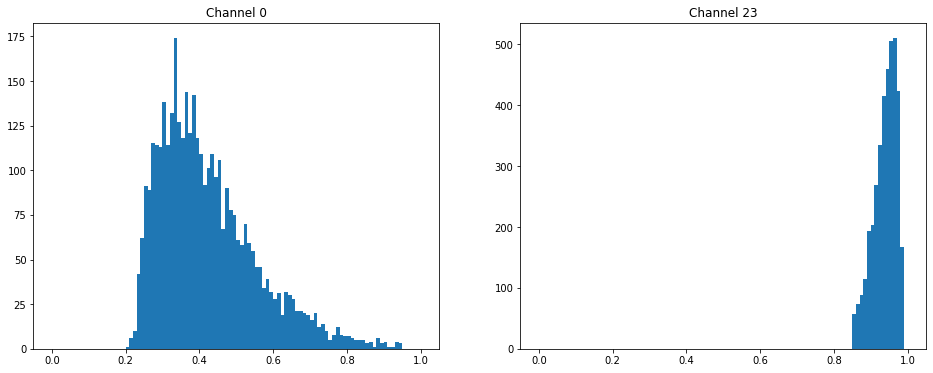

Number of events: 5327


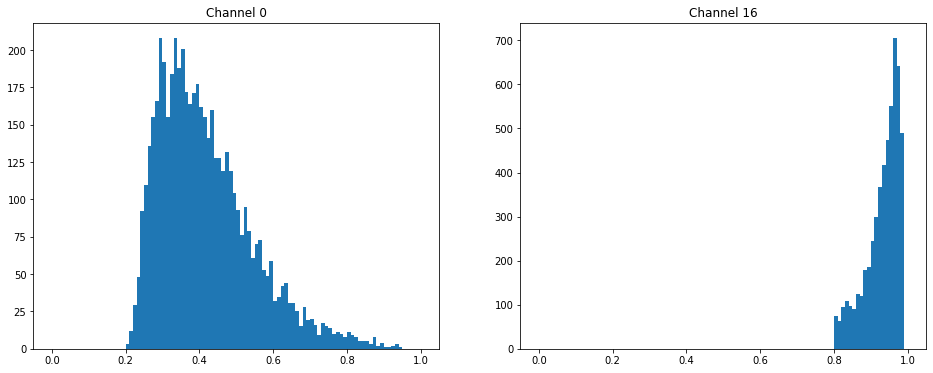

Number of events: 10118


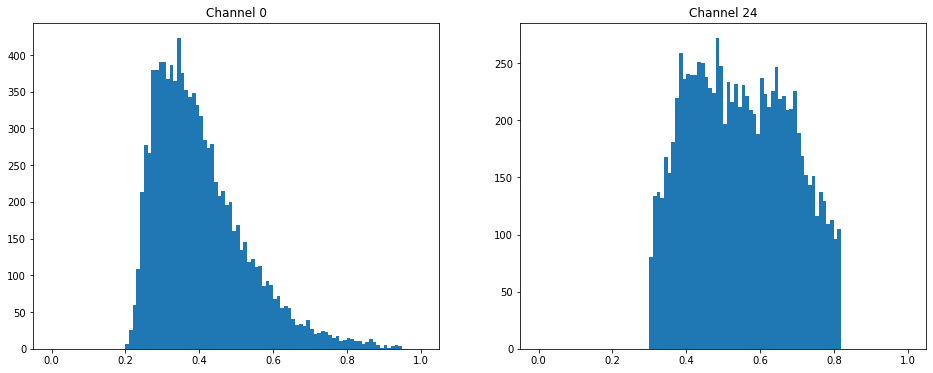

Number of events: 4342


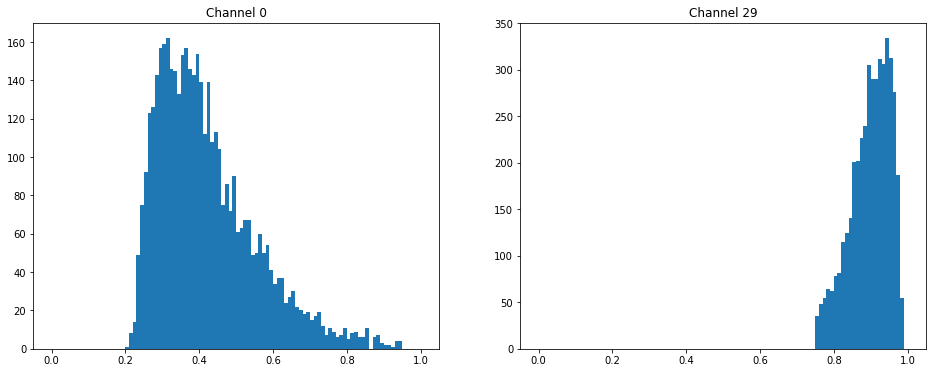

Number of events: 7364


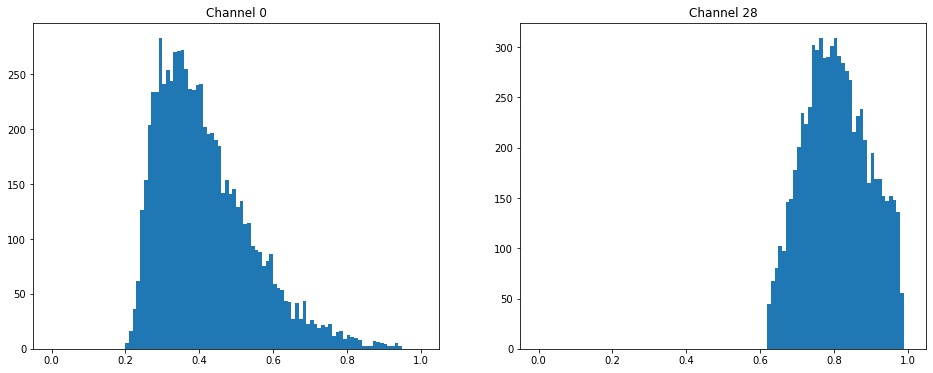

Number of events: 3012


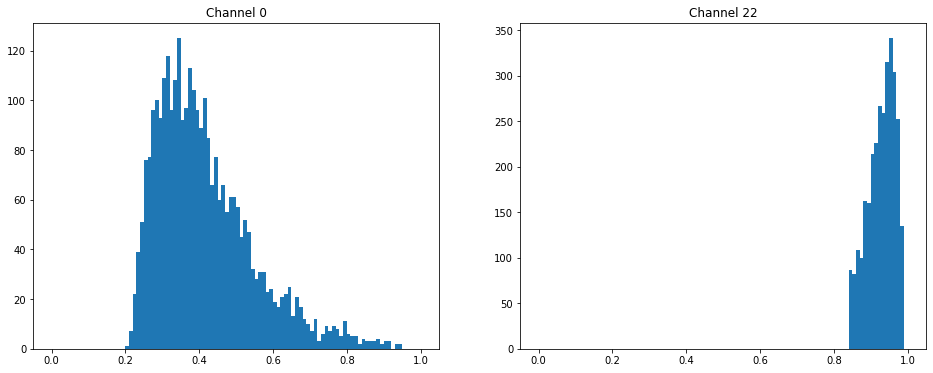

Number of events: 4161


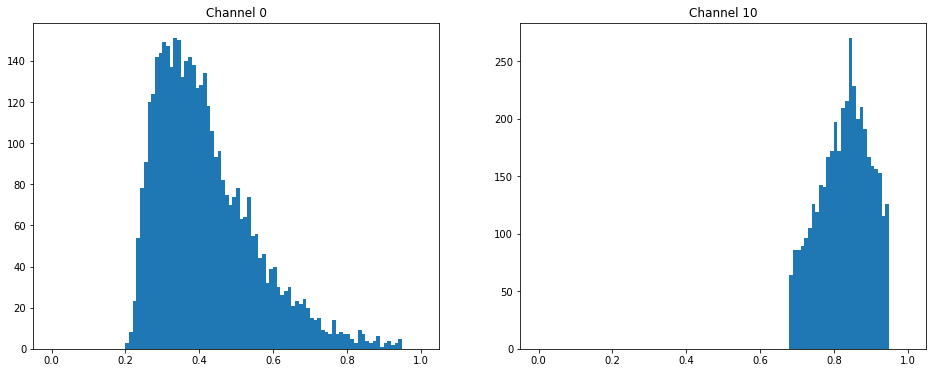

In [11]:
plot_channel_events_histograms(filtered_channel_events, ylim=False)

In [12]:
np.savez_compressed(PWD + f'/data/filtered/{FILE_NAME[:-4]}_filtered.npz', filtered_channel_events)

In [13]:
loaded_filtered_channel_events = np.load(PWD + f'/data/filtered/{FILE_NAME[:-4]}_filtered.npz', allow_pickle=True)['arr_0'].flat[0]
loaded_filtered_channel_events.keys()

dict_keys([17, 11, 23, 16, 24, 29, 28, 22, 10])

In [14]:
loaded_filtered_channel_events[best_channel].keys()

dict_keys(['sample_ampl', 'sample_channel', 'sample_t0', 'eventIDSampic'])